In [5]:
import pandas as pd
import numpy  as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline

In [6]:
df2019 = pd.read_csv('/content/drive/MyDrive/Faculdade/6° Período/Ciencia de Dados/IntroCD/02 - Analise exploratoria/DADOS2019/Presentes2019.csv')

In [7]:
df2020 = pd.read_csv('/content/drive/MyDrive/Faculdade/6° Período/Ciencia de Dados/IntroCD/02 - Analise exploratoria/DADOS2020/Presentes2020.csv')

In [8]:
df_SocioEconomico19 = df2019[['Estudo_Pai','Estudo_Mãe','Profissão_Pai','Profissão_Mãe','Renda_Familiar',
                              'QT_Carros','QT_Celular','QT_Computador','Acesso_Internet','Média_Notas']]

In [9]:
df_SocioEconomico20 = df2020[['SG_UF_PROVA','Estudo_Pai','Estudo_Mãe','Profissão_Pai','Profissão_Mãe','Renda_Familiar',
                              'QT_Carros','QT_Celular','QT_Computador','Acesso_Internet','Média_Notas']]

In [10]:
dic_renda = {'A':0, 'B':998, 'C':1247, 'D':1746, 'E':2245, 'F':2744, 'G':3493, 'H':4491, 'I':5489, 'J':6487, 'K':7485,
             'L':8483, 'M':9481, 'N':10978, 'O':13473, 'P':17465, 'Q':19960}

dic_profissao = {'A':0, 'B':0, 'C':0, 'F':0, 'D':1,'E':1}

dic_Empregados = {'A':0, 'B':1, 'C':2, 'D':3}

dic_zero_a_quatro = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}

dic_ensino = {'A':0, 'B':0, 'C':1, 'D':1, 'E':1, 'F':2, 'G':2, 'H':0}

In [11]:
#2019
df_SocioEconomico19['Renda_Familiar'] = df_SocioEconomico19['Renda_Familiar'].map(dic_renda)
df_SocioEconomico19['QT_Carros'] = df_SocioEconomico19['QT_Carros'].map(dic_zero_a_quatro)
df_SocioEconomico19['QT_Computador'] = df_SocioEconomico19['QT_Computador'].map(dic_zero_a_quatro)
df_SocioEconomico19['QT_Celular'] = df_SocioEconomico19['QT_Celular'].map(dic_zero_a_quatro)

<ipython-input-11-34acfb980927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SocioEconomico19['Renda_Familiar'] = df_SocioEconomico19['Renda_Familiar'].map(dic_renda)
<ipython-input-11-34acfb980927>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SocioEconomico19['QT_Carros'] = df_SocioEconomico19['QT_Carros'].map(dic_zero_a_quatro)
<ipython-input-11-34acfb980927>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [12]:
#2020
df_SocioEconomico20['Renda_Familiar'] = df_SocioEconomico20['Renda_Familiar'].map(dic_renda)
df_SocioEconomico20['QT_Carros'] = df_SocioEconomico20['QT_Carros'].map(dic_zero_a_quatro)
df_SocioEconomico20['QT_Computador'] = df_SocioEconomico20['QT_Computador'].map(dic_zero_a_quatro)
df_SocioEconomico20['QT_Celular'] = df_SocioEconomico20['QT_Celular'].map(dic_zero_a_quatro)

<ipython-input-12-14331eeddda5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SocioEconomico20['Renda_Familiar'] = df_SocioEconomico20['Renda_Familiar'].map(dic_renda)
<ipython-input-12-14331eeddda5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SocioEconomico20['QT_Carros'] = df_SocioEconomico20['QT_Carros'].map(dic_zero_a_quatro)
<ipython-input-12-14331eeddda5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [13]:
x = df_SocioEconomico20[['Estudo_Pai','Estudo_Mãe','Profissão_Mãe','Profissão_Pai','Renda_Familiar',
                              'QT_Carros','QT_Celular','QT_Computador','Acesso_Internet']]

# Treinando o Modelo com os dados de 2019

In [14]:
model = smf.ols('Média_Notas ~ Renda_Familiar + C(Acesso_Internet) + C(Estudo_Mãe) + C(Estudo_Pai) + C(Profissão_Pai) + C(Profissão_Mãe) + QT_Computador + QT_Carros' , data = df_SocioEconomico19)
response = model.fit()

In [15]:
print(response.summary())

                            OLS Regression Results                            
Dep. Variable:            Média_Notas   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 5.342e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:19:08   Log-Likelihood:            -2.1012e+07
No. Observations:             3701909   AIC:                         4.202e+07
Df Residuals:                 3701880   BIC:                         4.202e+07
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### R2 está ok, sendo que as nossas variáveis não abordam totalmente o que influencia na nota, apenas uma pequena parte.
### Já o R2 ajustado nos ajuda a entender se alguma das nossas variáveis não inluencia no nosso modelo, para isso ele diminuiria do e se afastaria do R2, o que não é o caso. Portando as variáveis utilizadas fazem sentido para o nosso modelo.
### Sobre o F-statistc não consegui compreender o quanto ele influencia no modelo. Pelo que li, se ele for maior que os valores da tabela, a hipótese nula é anulada e os parâmetros/coeficientes são conjuntamente significativos.
### Nosso Log-likehood está muito pequeno, após algumas leituras constatei que quanto maior melhor, se isso proceder, nosso modelo está horrível? Talvez não, devo comparar com fitando o modelo com outras variáveis e ver se não está tão horrível assim?
### Omnibus: descreve a normalidade da distribuíção dos nossos resíduos. Um 0 indicaria uma normalidade perfeita.
###  Skew e Kurtosis: Para os modelos é ideal que a distribuição dos dados tenham uma distribuição normal (assimetria 0 e curtose 3).
### Durbin-Watson: próximo de 2, evidência para ausência de autocorrelação


In [16]:
pred_val = response.fittedvalues.copy()
true_val = df_SocioEconomico19['Média_Notas'].values.copy()
residual = true_val - pred_val

# Gráficos para Avaliar o Modelo

## Histograma
### Os resíduos precisam ter distribuição normal com média 0

Text(0.5, 0, 'Resíduos')

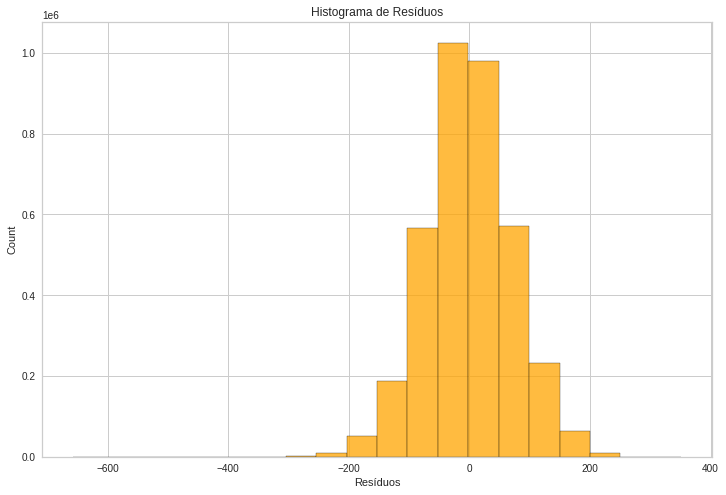

In [17]:
plt.figure(figsize=(12,8))

sns.histplot(residual, color='orange', bins=20)
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')

## Dispersão dos Resíduos

Text(0.5, 1.0, 'Gráfico de Resíduos X Média de Notas')

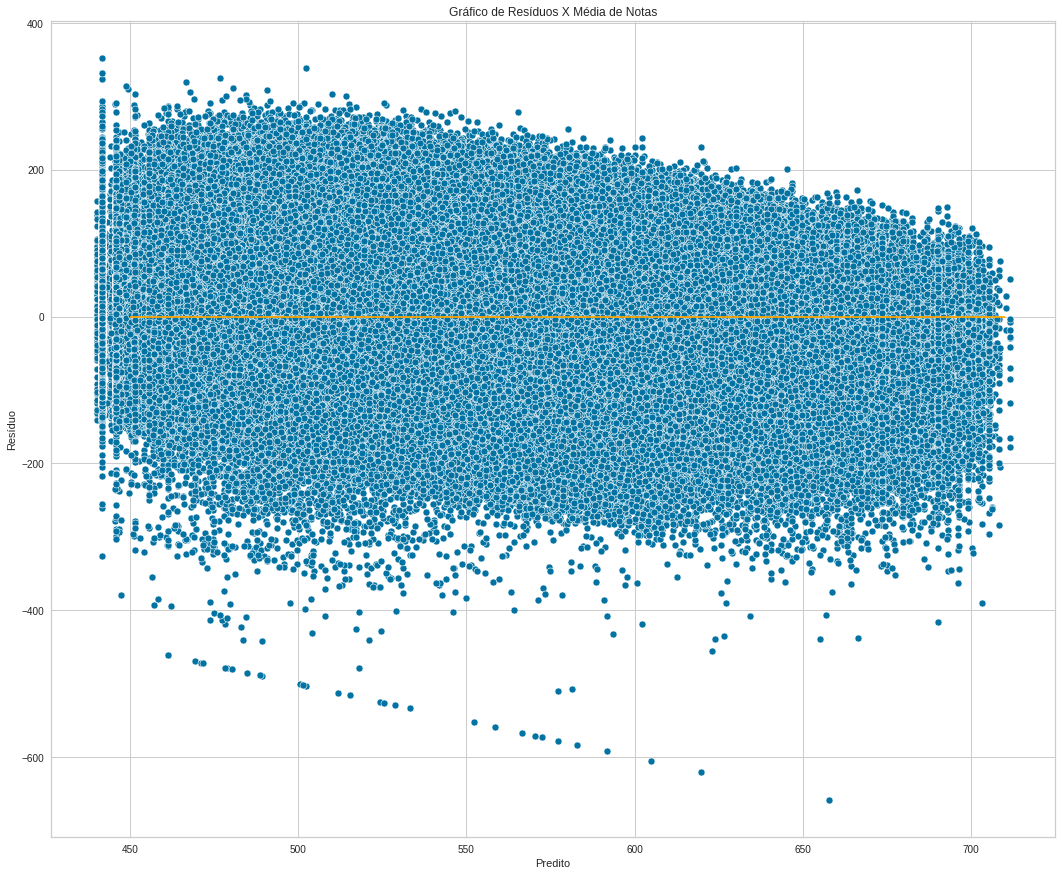

In [18]:
plt.figure(figsize=(18,15))

g1 = plt.hlines(y=0, xmin=450, xmax=710, color='orange')
g1 = sns.scatterplot(x = pred_val, y = residual)
plt.xlabel('Predito')
plt.ylabel('Resíduo')
plt.title('Gráfico de Resíduos X Média de Notas')

## Gráficos de Dispersão 

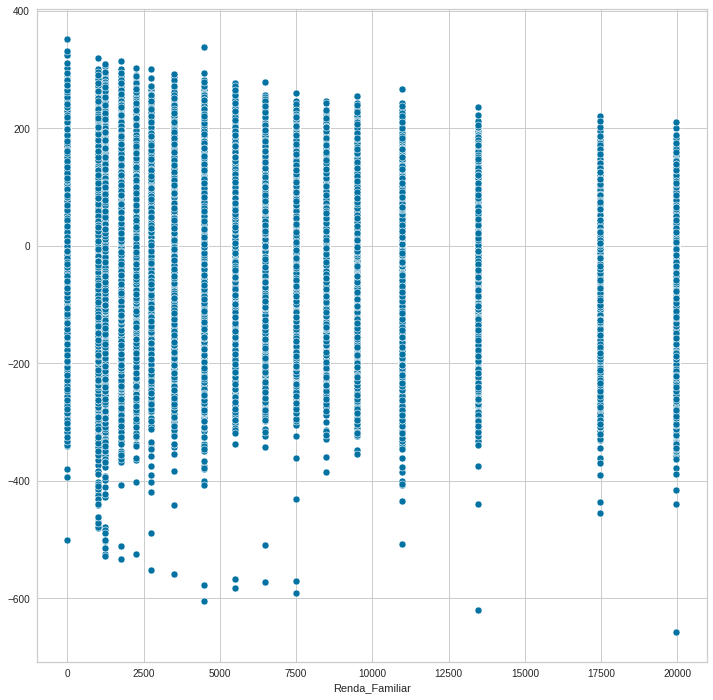

In [19]:
plt.figure(figsize=(12,12))
g1 = sns.scatterplot(x=df_SocioEconomico19['Renda_Familiar'], y=residual)

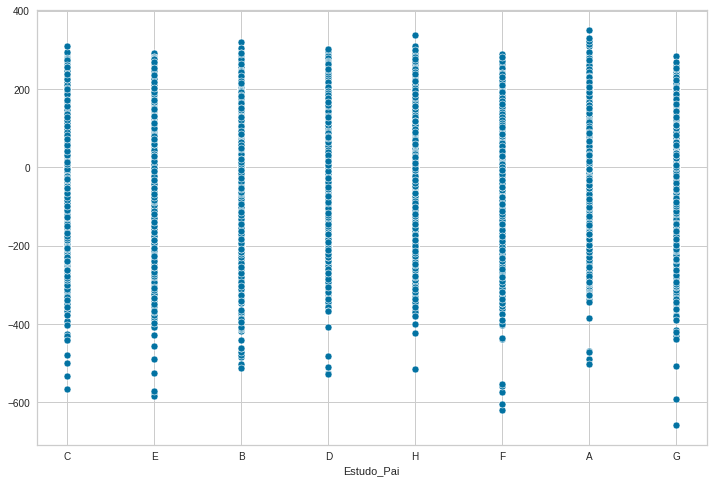

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_SocioEconomico19['Estudo_Pai'], y=residual)

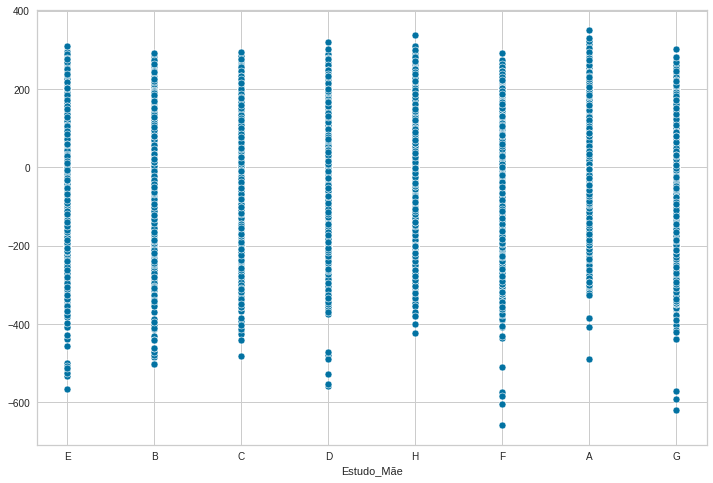

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_SocioEconomico19['Estudo_Mãe'], y=residual)

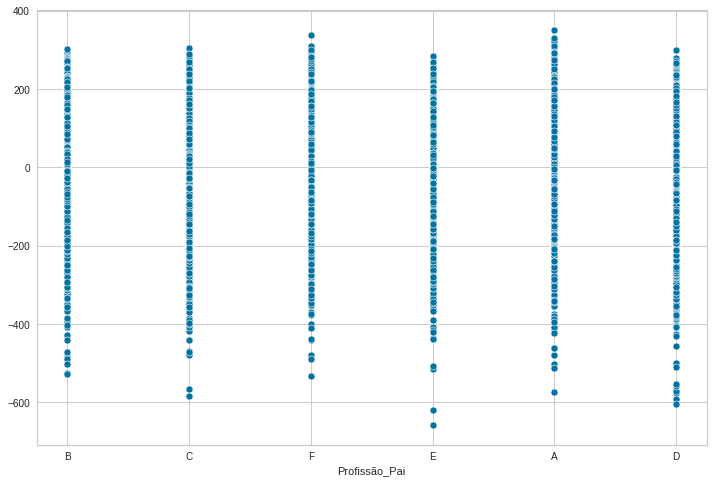

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_SocioEconomico19['Profissão_Pai'], y=residual)

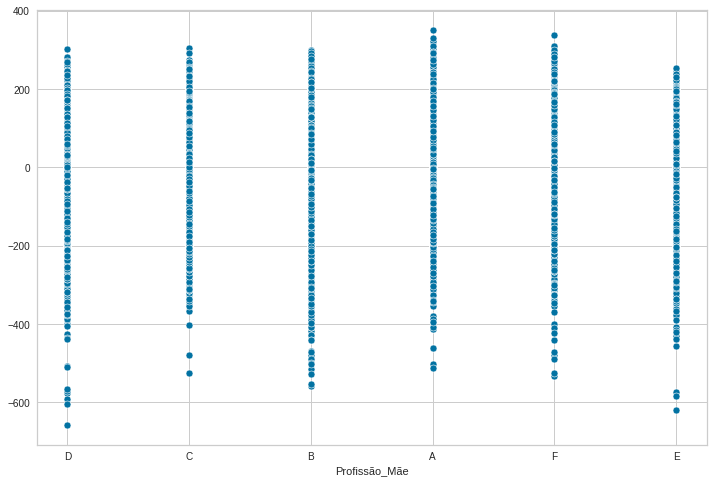

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_SocioEconomico19['Profissão_Mãe'], y=residual)

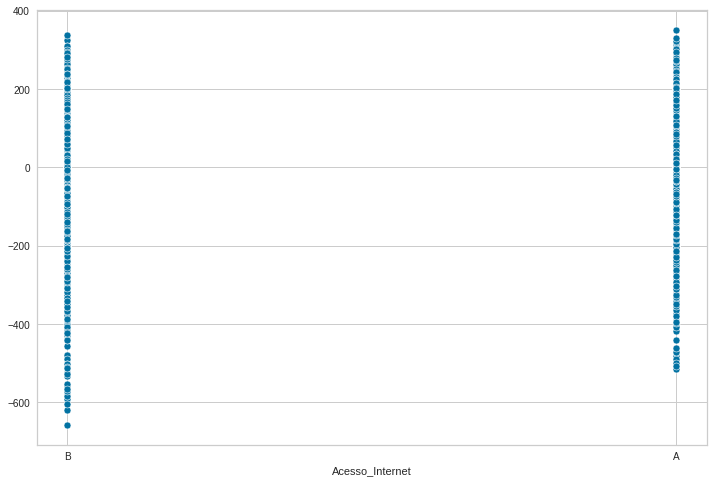

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_SocioEconomico19['Acesso_Internet'], y=residual)

In [25]:
predicao = response.predict(x)

In [26]:
df_resultados = pd.DataFrame(predicao, columns=['predicao'])

In [27]:
df_resultados['real'] = df_SocioEconomico20['Média_Notas']

In [28]:
df_resultados

,predicao,real
0,508.573740,566.98
1,478.410911,471.58
2,507.463617,587.38
3,511.199911,537.98
4,489.156128,466.94
...,...,...
2561299,497.194088,389.92
2561300,456.854515,433.92
2561301,486.611210,420.48
2561302,547.501545,690.74


In [29]:
df_resultados['residuos'] = df_resultados['real'] - df_resultados['predicao']
df_resultados

,predicao,real,residuos
0,508.573740,566.98,58.406260
1,478.410911,471.58,-6.830911
2,507.463617,587.38,79.916383
3,511.199911,537.98,26.780089
4,489.156128,466.94,-22.216128
...,...,...,...
2561299,497.194088,389.92,-107.274088
2561300,456.854515,433.92,-22.934515
2561301,486.611210,420.48,-66.131210
2561302,547.501545,690.74,143.238455


In [30]:
df_resultadof = pd.concat([df_resultados,df_SocioEconomico20],axis=1)

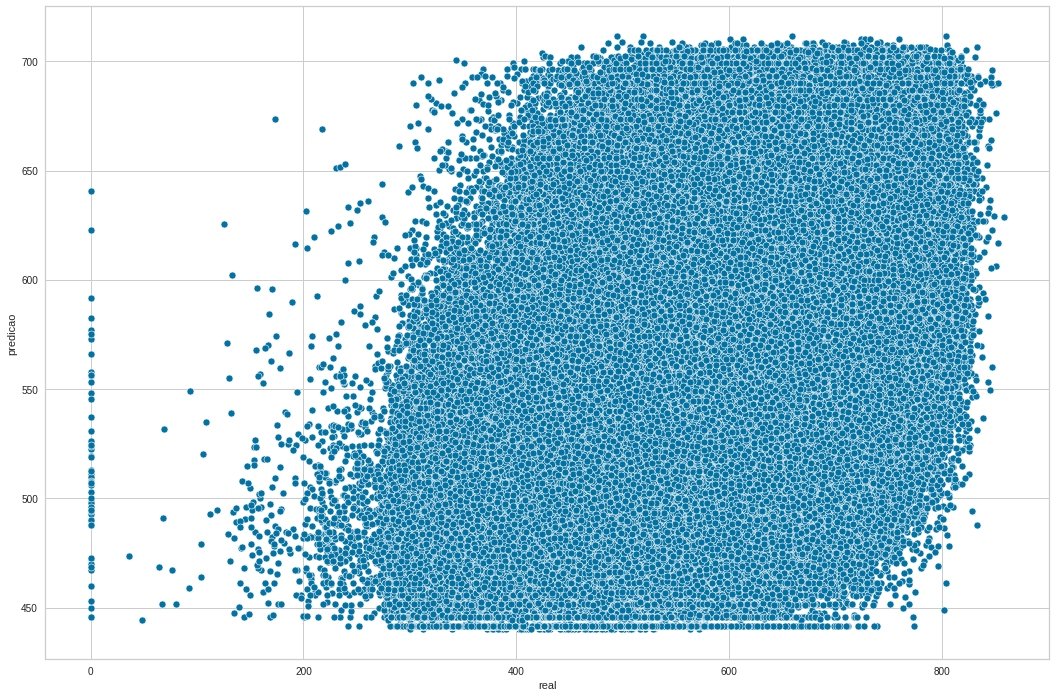

In [31]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='real',y='predicao',data=df_resultados)

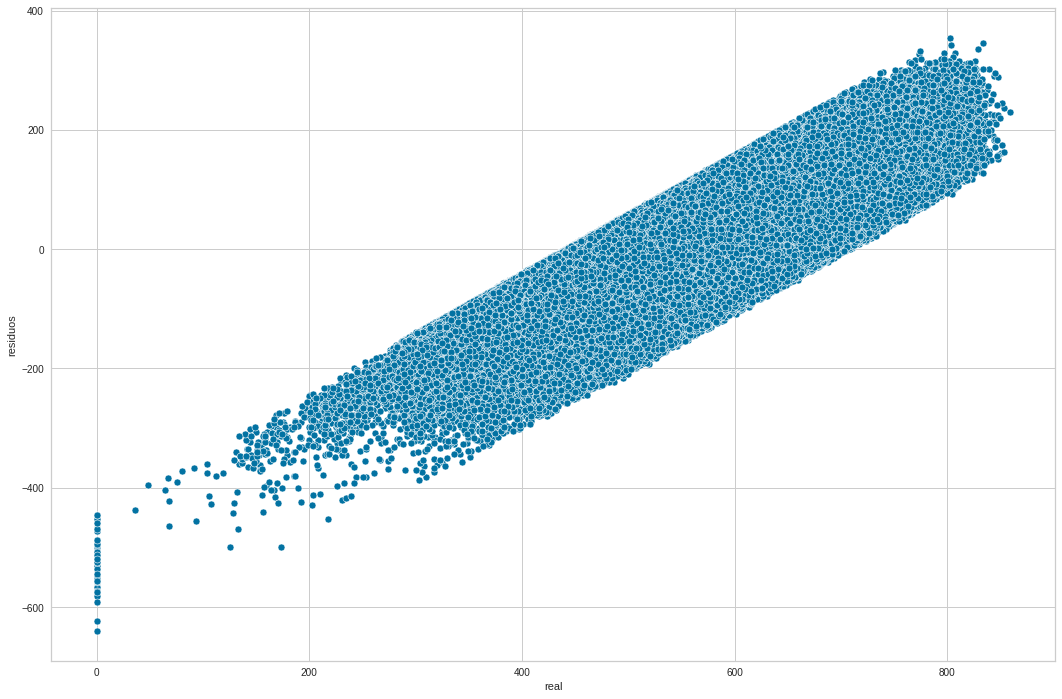

In [32]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='real',y='residuos',data=df_resultados)

Text(0.5, 1.0, 'BoxPlot Valor Real - Valor predito')

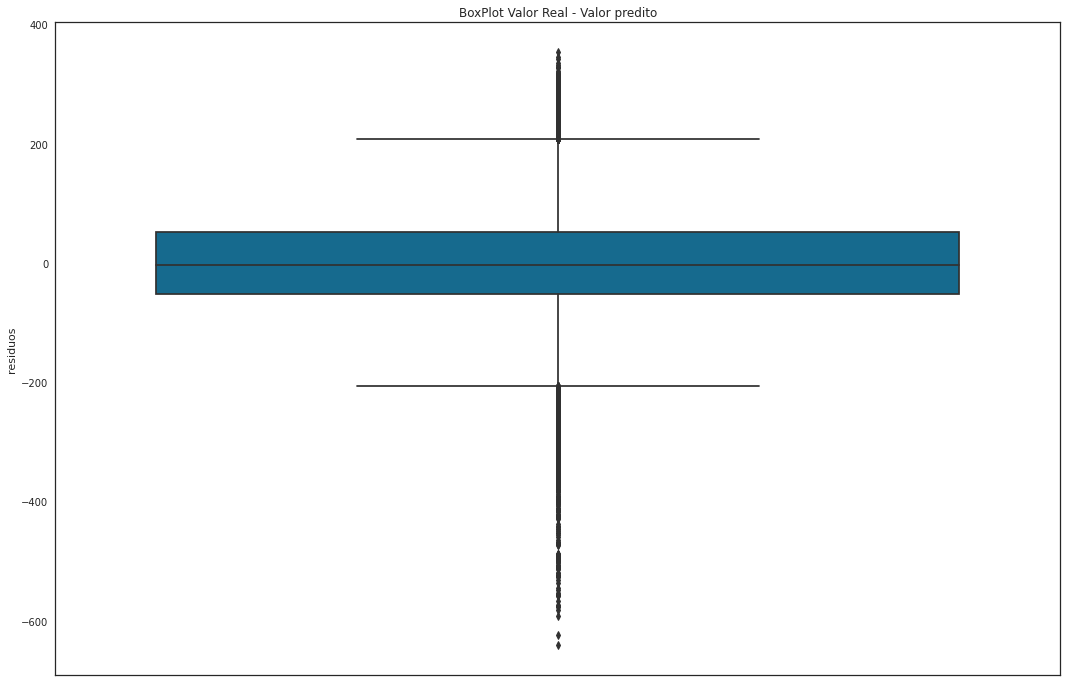

In [33]:
plt.figure(figsize=(18,12))
sns.set_style('ticks')
sns.boxplot(y='residuos',data=df_resultados)
plt.title('BoxPlot Valor Real - Valor predito')

In [34]:
df_resultados.describe()

,predicao,real,residuos
count,2.561304e+06,2.561304e+06,2.561304e+06
mean,5.250105e+02,5.265990e+02,1.588502e+00
std,4.542169e+01,9.152342e+01,7.729888e+01
min,4.401285e+02,0.000000e+00,-6.405586e+02
25%,4.926204e+02,4.593800e+02,-5.151057e+01
50%,5.162971e+02,5.168800e+02,-2.666387e+00
75%,5.487558e+02,5.871600e+02,5.204601e+01
max,7.114904e+02,8.585800e+02,3.537970e+02


In [35]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [36]:
outliers = find_outliers_IQR(df_resultados['residuos'])
df_out = pd.DataFrame(outliers)

In [37]:
df_resultadof

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
0,508.573740,566.98,58.406260,RS,C,B,C,B,1247,0,3,1,B,566.98
1,478.410911,471.58,-6.830911,PB,B,C,C,B,998,0,2,0,A,471.58
2,507.463617,587.38,79.916383,BA,B,C,C,B,998,0,2,1,B,587.38
3,511.199911,537.98,26.780089,AL,C,C,C,B,998,0,2,1,B,537.98
4,489.156128,466.94,-22.216128,PA,C,D,C,C,1746,0,2,0,A,466.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561299,497.194088,389.92,-107.274088,PB,B,D,A,F,998,0,3,1,B,389.92
2561300,456.854515,433.92,-22.934515,AC,A,B,A,A,1247,0,3,0,A,433.92
2561301,486.611210,420.48,-66.131210,PA,D,D,C,B,1247,0,3,0,A,420.48
2561302,547.501545,690.74,143.238455,CE,E,G,A,D,3493,1,3,1,B,690.74


In [38]:
df_outliers = df_resultadof.loc[df_out.index]
df_outliers

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
17,514.907383,727.32,212.412617,BA,E,C,B,B,998,0,3,1,B,727.32
124,522.837340,749.84,227.002660,CE,E,F,F,D,998,0,2,0,B,749.84
128,511.199911,720.30,209.100089,SP,C,C,C,B,998,0,2,1,B,720.30
212,478.635459,717.52,238.884541,RJ,C,C,B,B,998,0,3,0,A,717.52
223,492.200658,763.50,271.299342,SE,B,D,B,B,998,1,2,0,B,763.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559501,536.726045,301.46,-235.266045,AP,D,F,B,D,998,0,2,1,B,301.46
2560117,568.905617,346.76,-222.145617,MS,E,F,B,F,5489,1,3,2,B,346.76
2560937,499.439238,283.84,-215.599238,MA,C,C,B,B,2245,1,4,0,B,283.84
2560959,544.212041,319.10,-225.112041,BA,E,E,D,B,1746,0,1,1,B,319.10


In [39]:
df_overPerf = df_outliers.query('residuos>0')

In [40]:
df_overPerf

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
17,514.907383,727.32,212.412617,BA,E,C,B,B,998,0,3,1,B,727.32
124,522.837340,749.84,227.002660,CE,E,F,F,D,998,0,2,0,B,749.84
128,511.199911,720.30,209.100089,SP,C,C,C,B,998,0,2,1,B,720.30
212,478.635459,717.52,238.884541,RJ,C,C,B,B,998,0,3,0,A,717.52
223,492.200658,763.50,271.299342,SE,B,D,B,B,998,1,2,0,B,763.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553339,467.789164,685.24,217.450836,SP,D,B,A,A,1247,0,0,0,A,685.24
2554867,526.627609,740.98,214.352391,MA,E,E,B,B,1746,0,4,1,B,740.98
2556632,451.608467,715.80,264.191533,DF,A,A,B,B,0,0,0,0,A,715.80
2557856,557.836268,772.92,215.083732,AL,F,E,D,A,2744,1,4,1,B,772.92


In [41]:
df_underPerf = df_outliers.query('residuos<0')

In [42]:
df_underPerf

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
1288,484.743075,221.28,-263.463075,SP,E,B,A,A,998,0,1,0,B,221.28
4328,520.159018,310.76,-209.399018,RJ,C,C,E,B,998,0,2,1,B,310.76
4664,516.584154,292.98,-223.604154,CE,E,D,B,B,998,0,2,1,B,292.98
4900,563.998710,329.48,-234.518710,PR,E,E,D,C,1247,1,2,2,B,329.48
6103,526.306747,313.84,-212.466747,MG,C,C,D,B,1247,0,2,1,B,313.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559501,536.726045,301.46,-235.266045,AP,D,F,B,D,998,0,2,1,B,301.46
2560117,568.905617,346.76,-222.145617,MS,E,F,B,F,5489,1,3,2,B,346.76
2560937,499.439238,283.84,-215.599238,MA,C,C,B,B,2245,1,4,0,B,283.84
2560959,544.212041,319.10,-225.112041,BA,E,E,D,B,1746,0,1,1,B,319.10


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
normalizar = MinMaxScaler()

In [45]:
participantestotal = df_SocioEconomico20.groupby(['SG_UF_PROVA']).agg(count=('SG_UF_PROVA','count')).reset_index()
participantes = df_overPerf.groupby(['SG_UF_PROVA']).agg(count=('SG_UF_PROVA','count')).reset_index()
participantesUnder = df_underPerf.groupby(['SG_UF_PROVA']).agg(count=('SG_UF_PROVA','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
SG_UF_PROVA,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,26,229,63,15,827,1633,174,324,515,347,...,443,743,410,31,5,497,239,403,2021,53
total,18197,51082,49273,19302,206328,156908,51586,46007,89032,112721,...,105178,171140,65450,22513,6185,110667,51771,44189,376210,24568
under,48,145,212,80,428,312,194,133,256,327,...,302,508,153,83,50,248,155,95,1165,115


In [46]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('SG_UF_PROVA')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Estados'] = participantes['SG_UF_PROVA']
participantesNormalizados

,0,1,2,Estados
0,0.000000,1.0,0.001211,AC
1,0.001649,1.0,0.000000,AL
2,0.000000,1.0,0.003028,AM
3,0.000000,1.0,0.003370,AP
4,0.001938,1.0,0.000000,BA
5,0.008436,1.0,0.000000,CE
6,0.000000,1.0,0.000389,DF
7,0.004164,1.0,0.000000,ES
8,0.002917,1.0,0.000000,GO
9,0.000178,1.0,0.000000,MA


## Over e under Performers por Estado

Text(0, 0.5, 'Contagem')

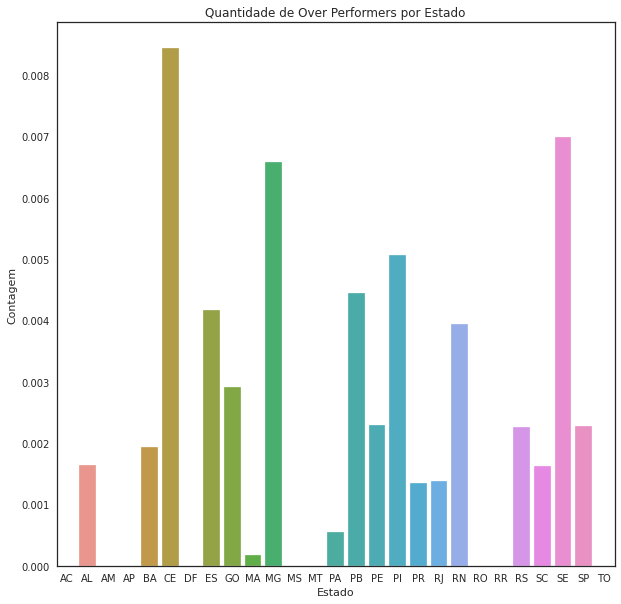

In [47]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Estado')
g1 = sns.barplot(x='Estados', y=0 ,data=participantesNormalizados)
plt.xlabel('Estado')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

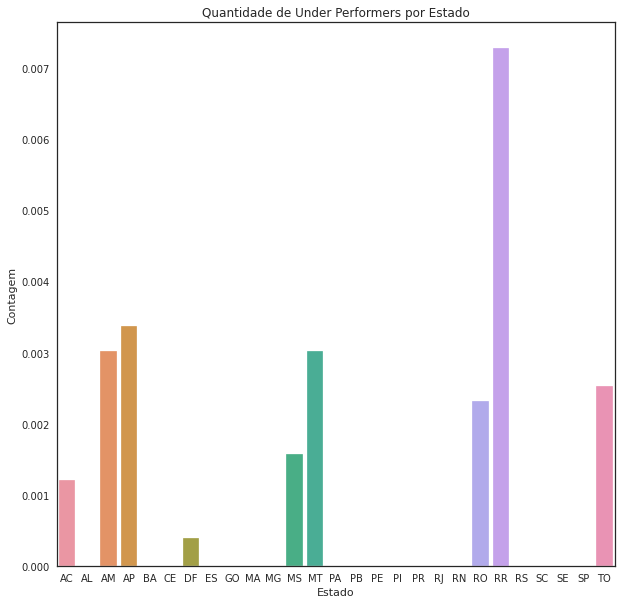

In [48]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Estado')
g2 = sns.barplot(x='Estados', y=2,data=participantesNormalizados)
plt.xlabel('Estado')
plt.ylabel('Contagem')

## Over e Under Performers por Acesso à Internet

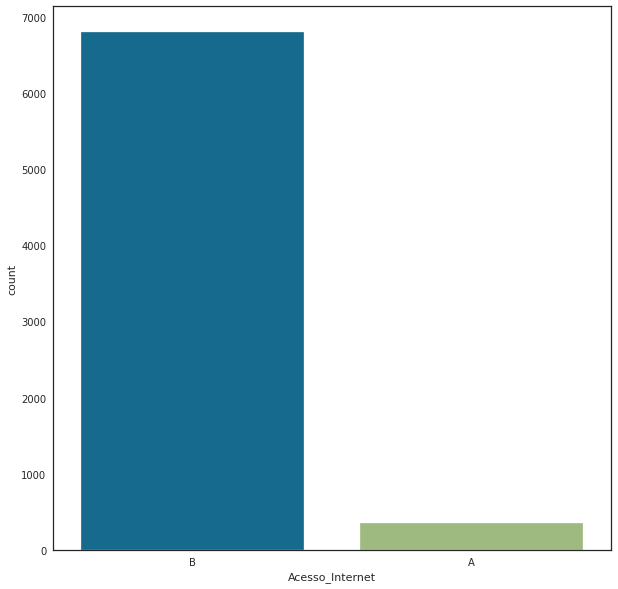

In [49]:
plt.figure(figsize=(10,10))
g1 = sns.countplot(x='Acesso_Internet',data=df_underPerf)

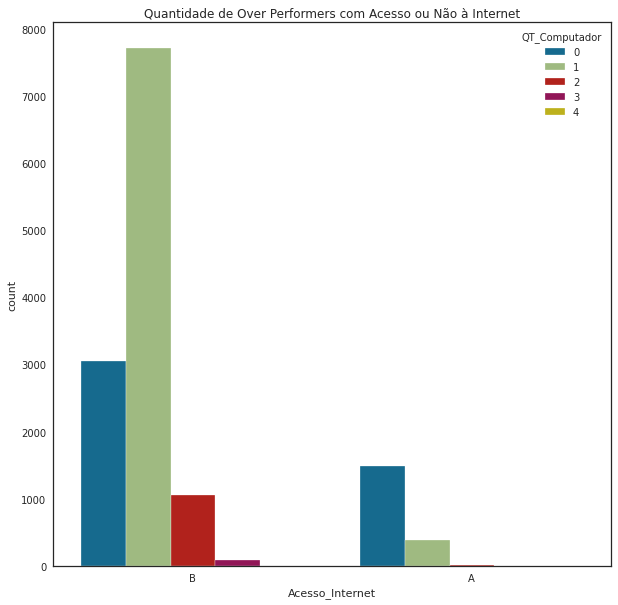

In [50]:
plt.figure(figsize=(10,10))
plt.title('Quantidade de Over Performers com Acesso ou Não à Internet')
g1 = sns.countplot(x='Acesso_Internet', hue='QT_Computador',data=df_overPerf)

In [51]:
df_semInternet = df_overPerf[df_overPerf.Acesso_Internet == 'A']

In [52]:
df_semInternet

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
212,478.635459,717.52,238.884541,RJ,C,C,B,B,998,0,3,0,A,717.52
249,469.394672,712.66,243.265328,BA,B,E,A,A,0,0,2,0,A,712.66
300,523.009792,821.86,298.850208,CE,F,E,D,B,998,0,1,0,A,821.86
682,474.345448,709.90,235.554552,RS,B,B,B,B,1746,0,0,0,A,709.90
794,488.315282,719.32,231.004718,GO,D,E,F,F,2245,0,3,0,A,719.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520054,461.265635,674.06,212.794365,SE,B,B,A,A,998,0,1,0,A,674.06
2530616,485.193029,706.68,221.486971,BA,C,C,A,A,998,0,2,1,A,706.68
2541495,524.083168,750.94,226.856832,ES,E,G,F,D,998,0,1,1,A,750.94
2553339,467.789164,685.24,217.450836,SP,D,B,A,A,1247,0,0,0,A,685.24


In [53]:
df_semInternet.query('QT_Computador == 0')

,predicao,real,residuos,SG_UF_PROVA,Estudo_Pai,Estudo_Mãe,Profissão_Pai,Profissão_Mãe,Renda_Familiar,QT_Carros,QT_Celular,QT_Computador,Acesso_Internet,Média_Notas
212,478.635459,717.52,238.884541,RJ,C,C,B,B,998,0,3,0,A,717.52
249,469.394672,712.66,243.265328,BA,B,E,A,A,0,0,2,0,A,712.66
300,523.009792,821.86,298.850208,CE,F,E,D,B,998,0,1,0,A,821.86
682,474.345448,709.90,235.554552,RS,B,B,B,B,1746,0,0,0,A,709.90
794,488.315282,719.32,231.004718,GO,D,E,F,F,2245,0,3,0,A,719.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511986,469.696401,698.18,228.483599,MA,C,C,A,A,1247,0,2,0,A,698.18
2518605,445.780165,728.72,282.939835,PE,A,A,A,A,998,0,3,0,A,728.72
2520054,461.265635,674.06,212.794365,SE,B,B,A,A,998,0,1,0,A,674.06
2553339,467.789164,685.24,217.450836,SP,D,B,A,A,1247,0,0,0,A,685.24


## Under e Over Performers por Renda

In [54]:
participantestotal = df_SocioEconomico20.groupby(['Renda_Familiar']).agg(count=('Renda_Familiar','count')).reset_index()
participantes = df_overPerf.groupby(['Renda_Familiar']).agg(count=('Renda_Familiar','count')).reset_index()
participantesUnder = df_underPerf.groupby(['Renda_Familiar']).agg(count=('Renda_Familiar','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Renda_Familiar,0,998,1247,1746,2245,2744,3493,4491,5489,6487,7485,8483,9481,10978,13473,17465,19960
count,616,3313,2370,2048,1278,1291,1175,737,402,195,140,79,82,44,22,2,2
total,170779,758530,421951,314351,162311,182396,143332,104197,63614,38715,30512,23208,31577,30166,27443,26640,31582
under,193,1162,745,697,374,496,455,415,265,180,165,136,205,232,290,435,714


In [55]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('Renda_Familiar')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Renda'] = participantes['Renda_Familiar']
participantesNormalizados

,0,1,2,Renda
0,0.002480,1.0,0.000000,0
1,0.002840,1.0,0.000000,998
2,0.003858,1.0,0.000000,1247
3,0.004307,1.0,0.000000,1746
4,0.005582,1.0,0.000000,2245
5,0.004371,1.0,0.000000,2744
6,0.005039,1.0,0.000000,3493
7,0.003103,1.0,0.000000,4491
8,0.002163,1.0,0.000000,5489
9,0.000389,1.0,0.000000,6487


Text(0, 0.5, 'Contagem')

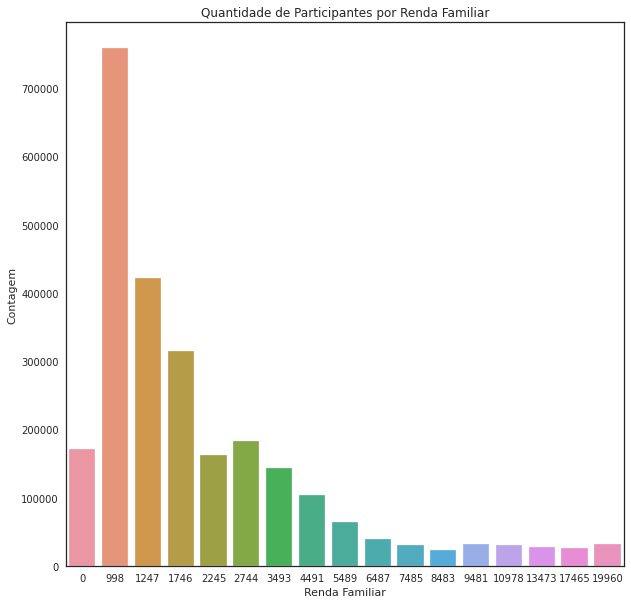

In [56]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Participantes por Renda Familiar')
g2 = sns.countplot(x='Renda_Familiar',data=df_SocioEconomico20)
plt.xlabel('Renda Familiar')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

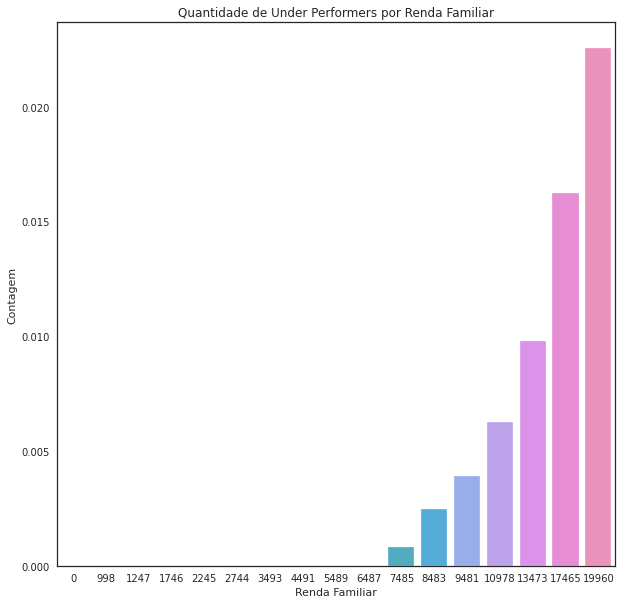

In [58]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Renda Familiar')
g2 = sns.barplot(x='Renda',y=2,data=participantesNormalizados)
plt.xlabel('Renda Familiar')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

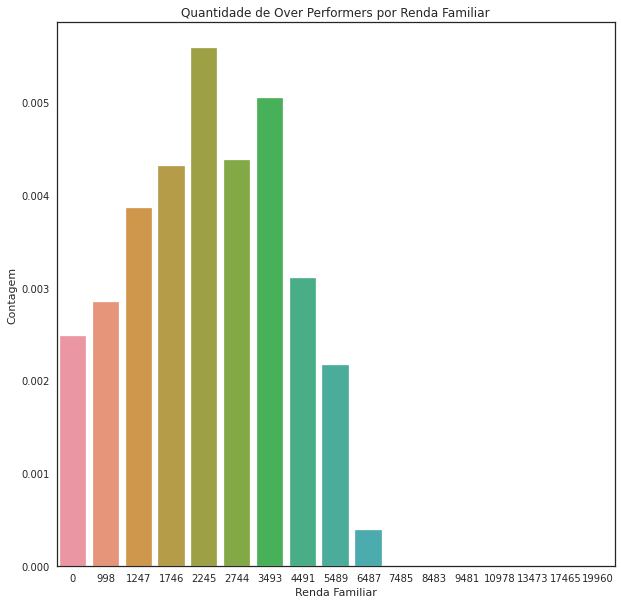

In [59]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Renda Familiar')
g2 = sns.barplot(x='Renda',y=0,data=participantesNormalizados)
plt.xlabel('Renda Familiar')
plt.ylabel('Contagem')

## Over e Under Performers por Nível de Estudo dos Pais

In [60]:
participantestotal = df_SocioEconomico20.groupby(['Estudo_Pai']).agg(count=('Estudo_Pai','count')).reset_index()
participantes = df_overPerf.groupby(['Estudo_Pai']).agg(count=('Estudo_Pai','count')).reset_index()
participantesUnder = df_underPerf.groupby(['Estudo_Pai']).agg(count=('Estudo_Pai','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5,6,7
Estudo_Pai,A,B,C,D,E,F,G,H
count,611,2365,2140,1814,4097,920,544,1305
total,113786,483323,352976,284175,736397,233881,157039,199727
under,107,492,555,624,2270,1453,1351,307


In [61]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('Estudo_Pai')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Estudo_Pai'] = participantes['Estudo_Pai']
participantesNormalizados

,0,1,2,Estudo_Pai
0,0.004434,1.0,0.000000,A
1,0.003879,1.0,0.000000,B
2,0.004497,1.0,0.000000,C
3,0.004197,1.0,0.000000,D
4,0.002489,1.0,0.000000,E
5,0.000000,1.0,0.002288,F
6,0.000000,1.0,0.005157,G
7,0.005005,1.0,0.000000,H


Text(0, 0.5, 'Contagem')

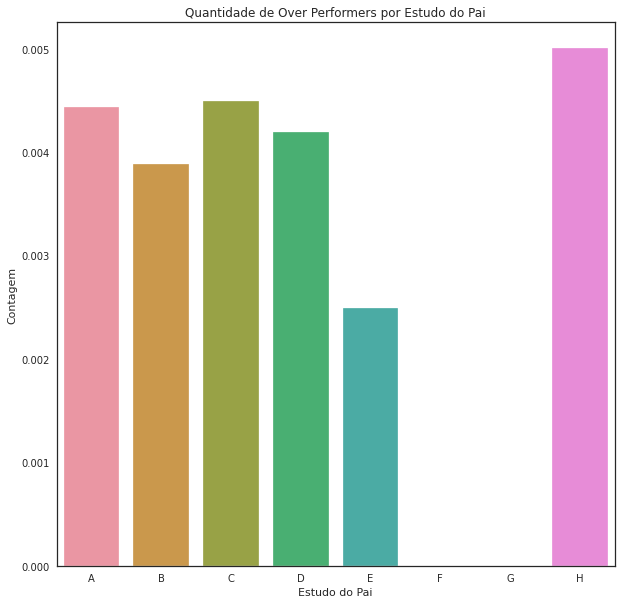

In [62]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Estudo do Pai')
g2 = sns.barplot(x='Estudo_Pai',y=0,data=participantesNormalizados)
plt.xlabel('Estudo do Pai')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

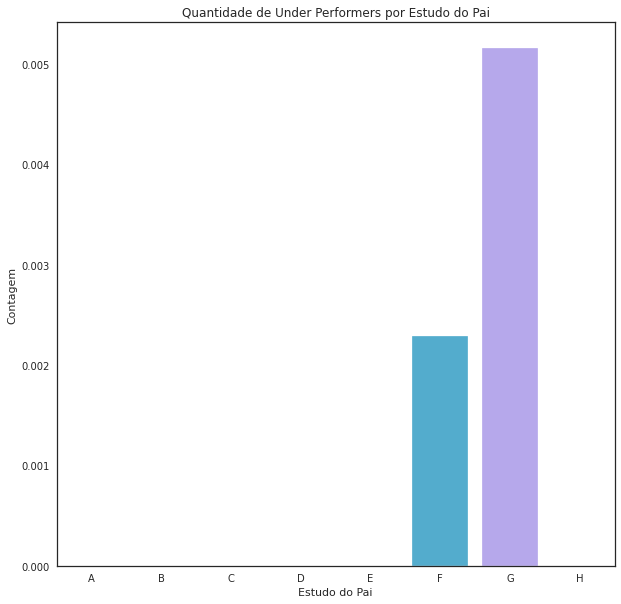

In [63]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Estudo do Pai')
g2 = sns.barplot(x='Estudo_Pai',y=2,data=participantesNormalizados)
plt.xlabel('Estudo do Pai')
plt.ylabel('Contagem')

In [64]:
participantestotal = df_SocioEconomico20.groupby(['Estudo_Mãe']).agg(count=('Estudo_Mãe','count')).reset_index()
participantes = df_overPerf.groupby(['Estudo_Mãe']).agg(count=('Estudo_Mãe','count')).reset_index()
participantesUnder = df_underPerf.groupby(['Estudo_Mãe']).agg(count=('Estudo_Mãe','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5,6,7
Estudo_Mãe,A,B,C,D,E,F,G,H
count,365,1526,1704,1792,5191,1447,1223,548
total,76337,358276,306430,294949,881498,312436,275108,56270
under,70,327,363,434,2209,1816,1856,84


In [65]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('Estudo_Mãe')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Estudo_Mãe'] = participantes['Estudo_Mãe']
participantesNormalizados

,0,1,2,Estudo_Mãe
0,0.003868,1.0,0.000000,A
1,0.003350,1.0,0.000000,B
2,0.004381,1.0,0.000000,C
3,0.004611,1.0,0.000000,D
4,0.003391,1.0,0.000000,E
5,0.000000,1.0,0.001187,F
6,0.000000,1.0,0.002311,G
7,0.008258,1.0,0.000000,H


Text(0, 0.5, 'Contagem')

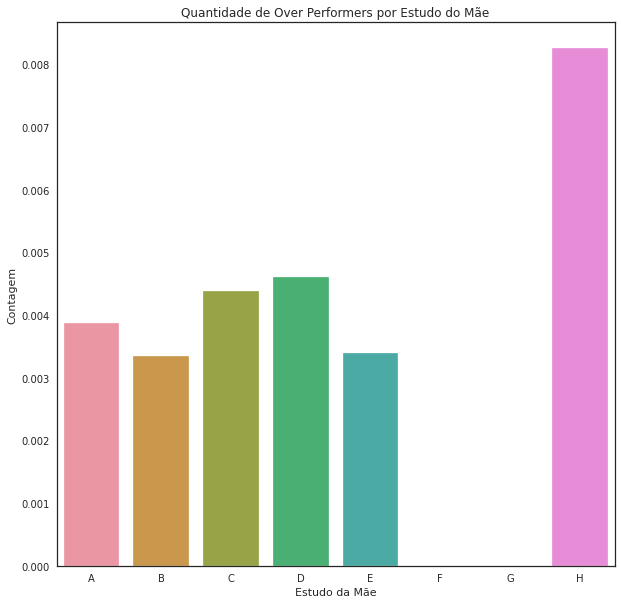

In [66]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Estudo do Mãe')
g2 = sns.barplot(x='Estudo_Mãe',y=0,data=participantesNormalizados)
plt.xlabel('Estudo da Mãe')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

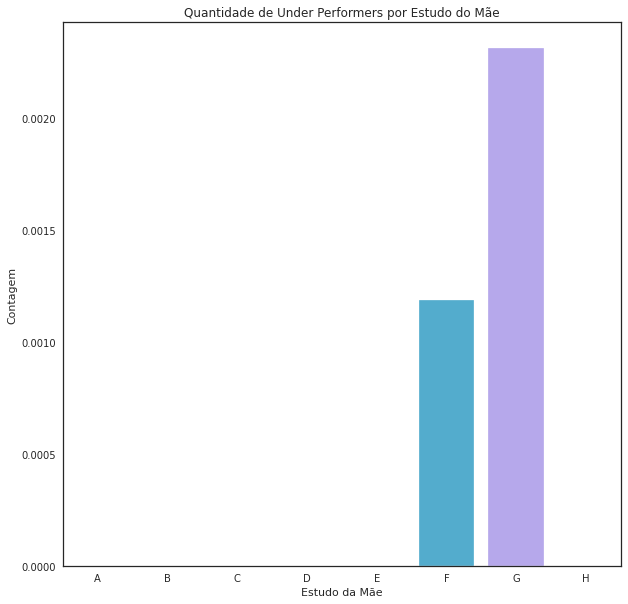

In [67]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Estudo do Mãe')
g2 = sns.barplot(x='Estudo_Mãe',y=2,data=participantesNormalizados)
plt.xlabel('Estudo da Mãe')
plt.ylabel('Contagem')

## Over e Under Performers Pela profissão dos pais

In [68]:
participantestotal = df_SocioEconomico20.groupby(['Profissão_Mãe']).agg(count=('Profissão_Mãe','count')).reset_index()
participantes = df_overPerf.groupby(['Profissão_Mãe']).agg(count=('Profissão_Mãe','count')).reset_index()
participantesUnder = df_underPerf.groupby(['Profissão_Mãe']).agg(count=('Profissão_Mãe','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5
Profissão_Mãe,A,B,C,D,E,F
count,2124,5711,957,3239,419,1346
total,388140,1069594,160025,621379,118565,203601
under,336,1758,381,3026,1167,491


In [69]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('Profissão_Mãe')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Profissão_Mãe'] = participantes['Profissão_Mãe']
participantesNormalizados

,0,1,2,Profissão_Mãe
0,0.004611,1.0,0.000000,A
1,0.003702,1.0,0.000000,B
2,0.003608,1.0,0.000000,C
3,0.000344,1.0,0.000000,D
4,0.000000,1.0,0.006331,E
5,0.004210,1.0,0.000000,F


Text(0, 0.5, 'Contagem')

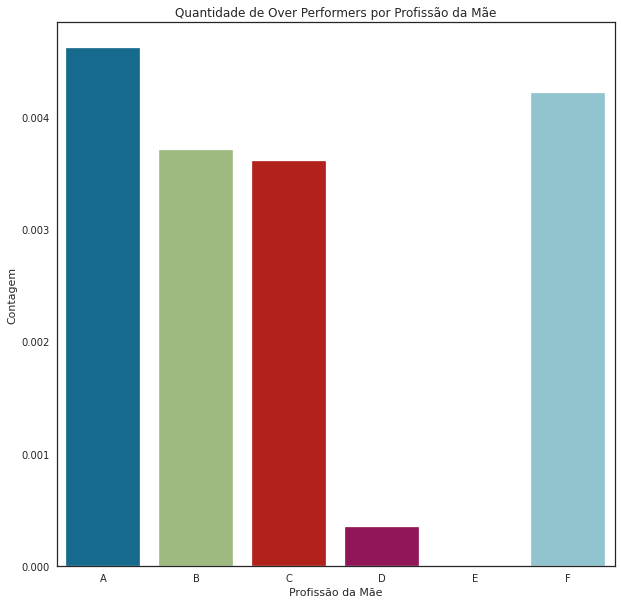

In [70]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Profissão da Mãe')
g2 = sns.barplot(x='Profissão_Mãe',y=0,data=participantesNormalizados)
plt.xlabel('Profissão da Mãe')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

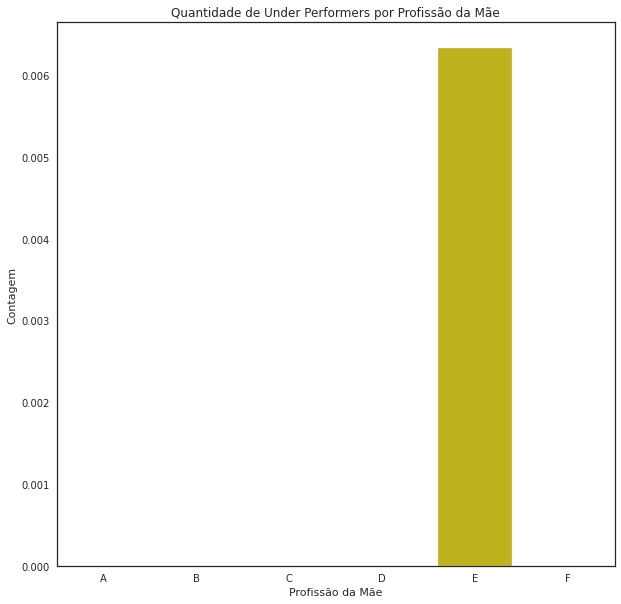

In [71]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Profissão da Mãe')
g2 = sns.barplot(x='Profissão_Mãe',y=2,data=participantesNormalizados)
plt.xlabel('Profissão da Mãe')
plt.ylabel('Contagem')

In [72]:
participantestotal = df_SocioEconomico20.groupby(['Profissão_Pai']).agg(count=('Profissão_Pai','count')).reset_index()
participantes = df_overPerf.groupby(['Profissão_Pai']).agg(count=('Profissão_Pai','count')).reset_index()
participantesUnder = df_underPerf.groupby(['Profissão_Pai']).agg(count=('Profissão_Pai','count')).reset_index()
participantes['total'] = participantestotal['count']
participantes['under'] = participantesUnder['count']
transpor = participantes.T
transpor

,0,1,2,3,4,5
Profissão_Pai,A,B,C,D,E,F
count,2810,2941,3154,2489,597,1805
total,478789,534440,588986,517502,167594,273993
under,488,862,1118,2592,1579,520


In [73]:
participantesNormalizados = pd.DataFrame(normalizar.fit_transform(transpor.drop('Profissão_Pai')))
participantesNormalizados = participantesNormalizados.T
participantesNormalizados['Profissão_Pai'] = participantes['Profissão_Pai']
participantesNormalizados

,0,1,2,Profissão_Pai
0,0.004855,1.0,0.00000,A
1,0.003896,1.0,0.00000,B
2,0.003463,1.0,0.00000,C
3,0.000000,1.0,0.00020,D
4,0.000000,1.0,0.00588,E
5,0.004699,1.0,0.00000,F


Text(0, 0.5, 'Contagem')

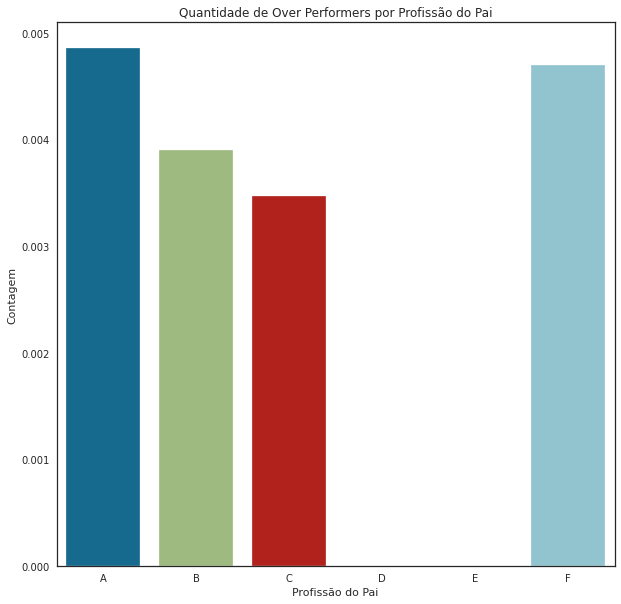

In [74]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Over Performers por Profissão do Pai')
g2 = sns.barplot(x='Profissão_Pai',y=0,data=participantesNormalizados)
plt.xlabel('Profissão do Pai')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

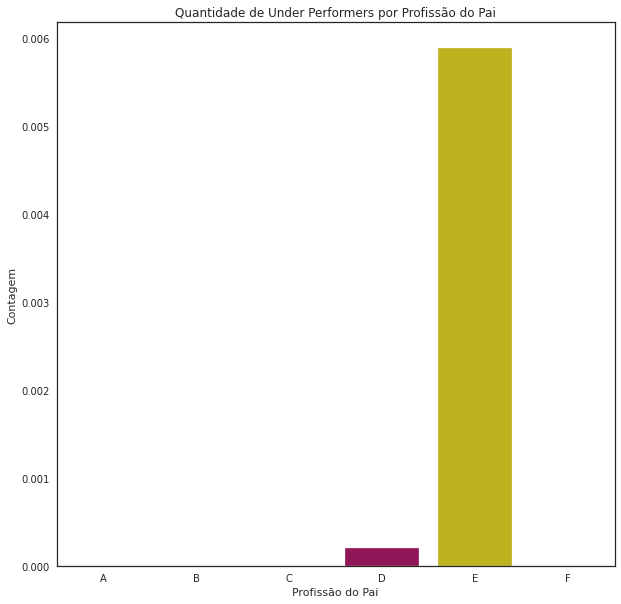

In [75]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
plt.title('Quantidade de Under Performers por Profissão do Pai')
g2 = sns.barplot(x='Profissão_Pai',y=2,data=participantesNormalizados)
plt.xlabel('Profissão do Pai')
plt.ylabel('Contagem')